In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#call library

import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def beforePrepro(folder_name):
     # set file path
    folder_path = f'/content/drive/MyDrive/research/{folder_name}'

    # load file name in folder
    file_names = os.listdir(folder_path)
    data_array = []
    # data_list = []

    for file in file_names:
        # set file path
        file_path = os.path.join(folder_path, file)
        
        # load csv file as dataframe
        df = pd.read_csv(file_path)

        #preprocessing column
        df = df.drop(['Date','Open','Close'], axis=1)
        df = df.rename(columns={'Adj Close':'Close'})
        df['Diff'] = df['High'] - df['Low']
        df = df.drop(['High','Low'], axis=1)

        #change 0 value to 0.000001
        df = df.replace(0, 0.000001)

        #insert list to array
        data_array.append(df)

    #list to numpy array and return
    return np.array(data_array)

In [ ]:
xGrowthsBefore = beforePrepro('growth2000')
xValuesBefore = beforePrepro('value2000')

<ipython-input-3-d67035939361>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data_array)
<ipython-input-3-d67035939361>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data_array)


In [ ]:
len(xValuesBefore)

1326

In [ ]:
len(xGrowthsBefore)

720

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
xValuesBefore[0].describe()

,Close,Volume,Diff
count,1258.000,1258.000,1258.000
mean,43.818,1150274.086,0.752
std,6.951,1270271.674,0.468
min,25.410,208500.000,0.190
25%,37.502,600975.000,0.470
50%,44.720,861200.000,0.630
75%,49.448,1293275.000,0.890
max,56.830,22688300.000,5.620


In [ ]:
xGrowthsBefore[0].describe()

,Close,Volume,Diff
count,1257.000,1257.000,1257.000
mean,81.866,375509.785,2.593
std,32.333,300147.727,1.954
min,30.394,46300.000,0.500
25%,56.553,225900.000,1.400
50%,74.165,311500.000,2.090
75%,115.811,446400.000,3.300
max,146.163,6248700.000,32.490


In [ ]:
def concatenator(listarray):
    newdf = pd.DataFrame()
    for i in range(len(listarray)):
        newdf = pd.concat([newdf, listarray[i]], axis = 0, ignore_index = True)
    return newdf

In [ ]:
xGrowthsBeforeTotal = concatenator(xGrowthsBefore)
xValuesBeforeTotal = concatenator(xValuesBefore)

In [ ]:
xGrowthsBeforeTotal.describe()

,Close,Volume,Diff
count,775978.000,775978.000,775978.000
mean,74.670,1873359.359,2.622
std,139.422,10841769.027,4.874
min,0.110,0.000,0.000
25%,15.439,166700.000,0.610
50%,36.583,430300.000,1.340
75%,82.965,1105500.000,2.870
max,2706.929,918194300.000,295.300


In [ ]:
xValuesBeforeTotal.describe()

,Close,Volume,Diff
count,1517958.000,1517958.000,1517959.000
mean,49.479,1956667.701,1.564
std,133.511,6458314.199,11.886
min,0.090,0.000,0.000
25%,14.517,155200.000,0.450
50%,28.934,518100.000,0.860
75%,53.737,1559200.000,1.620
max,12750.000,1222342500.000,10095.000


In [ ]:
xBeforeTotal = pd.concat([xGrowthsBeforeTotal, xValuesBeforeTotal], axis = 0, ignore_index = True)

In [ ]:
xBeforeTotal.describe()

,Close,Volume,Diff
count,2293936.000,2293936.000,2293937.000
mean,58.000,1928486.688,1.922
std,136.062,8207558.799,10.088
min,0.090,0.000,0.000
25%,14.760,159900.000,0.490
50%,30.856,482600.000,0.980
75%,62.086,1383100.000,1.970
max,12750.000,1222342500.000,10095.000


In [ ]:
scaler = MinMaxScaler()

def preprocessing(folder_name):
   # set file path
    folder_path = f'/content/drive/MyDrive/research/{folder_name}'

    # load file name in folder
    file_names = os.listdir(folder_path)
    data_array = []
    # data_list = []

    for file in file_names:
        # set file path
        file_path = os.path.join(folder_path, file)
        
        # load csv file as dataframe
        df = pd.read_csv(file_path)

        #preprocessing column
        df = df.drop(['Date','Open','Close'], axis=1)
        df = df.rename(columns={'Adj Close':'Close'})
        df['Diff'] = df['High'] - df['Low']
        df = df.drop(['High','Low'], axis=1)

        #change 0 value to 0.000001
        df = df.replace(0, 0.000001)

        #log transform
        df = np.log(df)

        #using minmaxscaler of each column in df
        df[['Close','Volume','Diff']] = scaler.fit_transform(df[['Close','Volume','Diff']])

        #insert list to array
        data_array.append(df)

    #list to numpy array and return
    return np.array(data_array)
        
        # save dataframe in variable without '.csv' extension
        # var_name = file.replace('.csv', '')
        # globals()[var_name] = df
        # data_list.append(var_name)

In [ ]:
#call preprocessing function
xGrowths = preprocessing('growth2000')
xValues = preprocessing('value2000')

<ipython-input-58-8a05aa07517a>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data_array)
<ipython-input-58-8a05aa07517a>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data_array)


In [ ]:
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
xValues[0].describe()

,Close,Volume,Diff
count,1258.000000,1258.000000,1258.000000
mean,0.660664,0.316244,0.367232
std,0.203746,0.127582,0.144778
min,0.000000,0.000000,0.000000
25%,0.483606,0.225733,0.267404
50%,0.702277,0.302449,0.353906
75%,0.827122,0.389152,0.455911
max,1.000000,1.000000,1.000000


In [ ]:
xGrowths[0].describe()

,Close,Volume,Diff
count,1257.000000,1257.000000,1257.000000
mean,0.578193,0.393636,0.351603
std,0.264852,0.110563,0.138634
min,0.000000,0.000000,0.000000
25%,0.395386,0.323130,0.246670
50%,0.568019,0.388637,0.342665
75%,0.851791,0.461994,0.452092
max,1.000000,1.000000,1.000000


In [ ]:
xValuesTotal = concatenator(xValues)
xGrowthsTotal = concatenator(xGrowths) 

In [ ]:
xValuesTotal.describe()

,Close,Volume,Diff
count,1517958.000000,1517958.000000,1517959.000000
mean,0.598551,0.431542,0.467562
std,0.234500,0.186146,0.199804
min,0.000000,0.000000,0.000000
25%,0.426685,0.303311,0.325984
50%,0.628937,0.401890,0.441624
75%,0.791224,0.523204,0.583398
max,1.000000,1.000000,1.000000


In [ ]:
xGrowthsTotal.describe()

,Close,Volume,Diff
count,775978.000000,775978.000000,775978.000000
mean,0.552275,0.435104,0.494733
std,0.251534,0.190516,0.204530
min,0.000000,0.000000,0.000000
25%,0.349204,0.303363,0.347023
50%,0.572665,0.404600,0.480793
75%,0.766188,0.531899,0.629754
max,1.000000,1.000000,1.000000


In [ ]:
xAfterTotal = pd.concat([xGrowthsTotal, xValuesTotal], axis = 0, ignore_index = True)

In [ ]:
xAfterTotal.describe()

,Close,Volume,Diff
count,2293936.000000,2293936.000000,2293937.000000
mean,0.582897,0.432747,0.476753
std,0.241392,0.187643,0.201825
min,0.000000,0.000000,0.000000
25%,0.398903,0.303329,0.332317
50%,0.611573,0.402819,0.454044
75%,0.783636,0.526081,0.600607
max,1.000000,1.000000,1.000000


In [ ]:
def bootstrap(data, n_samples):
    # generate bootstrap sample
    samples = []
    # sampling n_samples times
    for i in range(n_samples):
        # randomly sample from data with replacement
        sample = np.random.choice(data, size=1, replace=True)
        # append sample to ndarray
        samples = np.append(samples, sample)
    return samples

In [ ]:
n_samples = len(xValues) - len(xGrowths)
xGrowths_bootstrapped = bootstrap(xGrowths, n_samples)
xGrowths = np.concatenate((xGrowths, xGrowths_bootstrapped), axis=0)

In [ ]:
#generate y values
yGrowths = np.zeros(len(xGrowths))
yValues = np.ones(len(xValues))

In [ ]:
#concatenate growths and values
x = np.concatenate((xGrowths, xValues), axis=0)
y = np.concatenate((yGrowths, yValues), axis=0)

In [ ]:
def splitData(x, y, train_ratio=0.8):
    # shuffle data
    permutation = np.random.permutation(len(x))
    x = x[permutation]
    y = y[permutation]

    # split data
    n_train_samples = int(train_ratio * len(x))
    x_train, x_test = x[:n_train_samples], x[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]

    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = splitData(x, y)

In [ ]:
# # to give more weight to minority class
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
x_train = pad_sequences(x_train, dtype='float32')
x_test = pad_sequences(x_test, dtype='float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#modify NaN to 0
x_train = np.nan_to_num(x_train, nan=0)
x_test = np.nan_to_num(x_test, nan=0)

In [ ]:
x_train.shape #2121 data samples, 1258 days, 3 features

(2121, 1258, 3)

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [ ]:
import random

def random5(data,label):
    idx = []
    for i in range(0,5):
        idx.append(random.randint(0,len(data)-1))

    selected = []
    target = []
    for i in idx:
        selected.append(data[i])
        target.append(label[i])
    
    final = []
    for i in selected:
        final.append(pd.DataFrame(i, columns=['Close','Volume','Diff']).tail(5))
    return final, target

In [ ]:
forVisualize,forTarget = random5(x_train, y_train)

In [ ]:
forVisualize

[        Close   Volume     Diff
 1253 0.812197 0.780957 0.475231
 1254 0.776331 0.618464 0.595981
 1255 0.754993 0.513234 0.582393
 1256 0.781021 0.699065 0.555533
 1257 0.782580 0.573092 0.693028,
         Close   Volume     Diff
 1253 0.441121 0.661049 0.809276
 1254 0.417561 0.646005 0.823027
 1255 0.436473 0.672907 0.810349
 1256 0.459358 0.703799 0.836948
 1257 0.459125 0.658957 0.783140,
         Close   Volume     Diff
 1253 0.323991 0.558469 0.078814
 1254 0.323991 0.595248 0.134733
 1255 0.323991 0.548545 0.000000
 1256 0.323329 0.607430 0.000000
 1257 0.324653 0.564671 0.134733,
         Close   Volume     Diff
 1253 0.018551 0.947116 0.740996
 1254 0.105016 0.968174 0.789924
 1255 0.169034 0.943171 0.811772
 1256 0.163577 0.899082 0.730583
 1257 0.127823 0.886628 0.779979,
         Close   Volume     Diff
 1253 0.621049 0.288691 0.389302
 1254 0.602074 0.251314 0.480790
 1255 0.599193 0.218985 0.495705
 1256 0.607015 0.215346 0.349466
 1257 0.612876 0.229671 0.232590]

In [ ]:
forTarget

[array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32)]

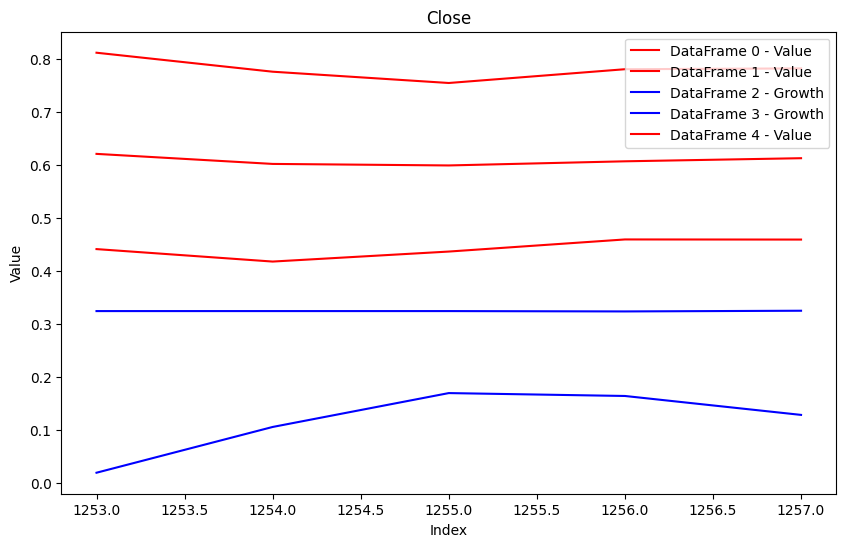

In [ ]:
plt.figure(figsize=(10, 6))
for index, df in enumerate(forVisualize):
    if (forTarget[index][0] == 1):
        plt.plot(df['Close'], label=f'DataFrame {index} - Growth', color='blue')
    else:
        plt.plot(df['Close'], label=f'DataFrame {index} - Value', color='red')
plt.legend()
plt.title('Close')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

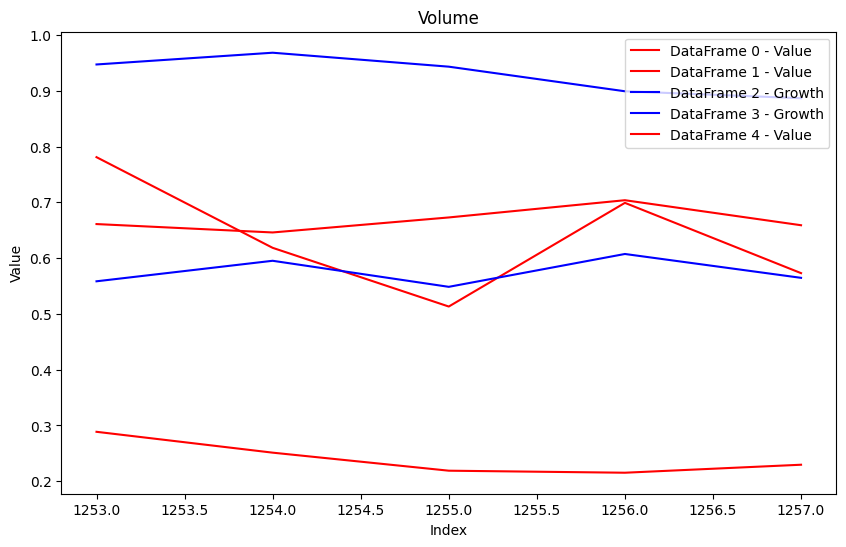

In [ ]:
plt.figure(figsize=(10, 6))
for index, df in enumerate(forVisualize):
    if (forTarget[index][0] == 1):
        plt.plot(df['Volume'], label=f'DataFrame {index} - Growth', color='blue')
    else:
        plt.plot(df['Volume'], label=f'DataFrame {index} - Value', color='red')
plt.legend()
plt.title('Volume')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

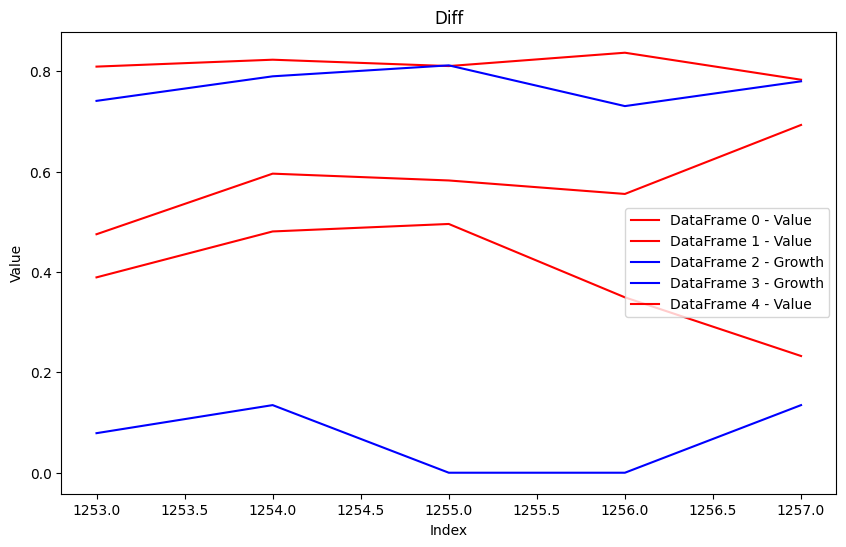

In [ ]:
plt.figure(figsize=(10, 6))
for index, df in enumerate(forVisualize):
    if (forTarget[index][0] == 1):
        plt.plot(df['Diff'], label=f'DataFrame {index} - Growth', color='blue')
    else:
        plt.plot(df['Diff'], label=f'DataFrame {index} - Value', color='red')
plt.legend()
plt.title('Diff')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(1258,3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, epochs=3000, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/3000
27/27 [==============================] - 9s 150ms/step - loss: 0.6946 - acc: 0.4982 - val_loss: 0.6862 - val_acc: 0.5624
Epoch 2/3000
27/27 [==============================] - 2s 87ms/step - loss: 0.6868 - acc: 0.5666 - val_loss: 0.6989 - val_acc: 0.4941
Epoch 3/3000
27/27 [==============================] - 2s 82ms/step - loss: 0.6994 - acc: 0.4947 - val_loss: 0.6972 - val_acc: 0.4941
Epoch 4/3000
27/27 [==============================] - 2s 83ms/step - loss: 0.6965 - acc: 0.4953 - val_loss: 0.6941 - val_acc: 0.4941
Epoch 5/3000
27/27 [==============================] - 2s 82ms/step - loss: 0.6949 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.4988
Epoch 6/3000
27/27 [==============================] - 2s 85ms/step - loss: 0.6938 - acc: 0.4906 - val_loss: 0.6927 - val_acc: 0.4988
Epoch 7/3000
27/27 [==============================] - 3s 100ms/step - loss: 0.6949 - acc: 0.5006 - val_loss: 0.6934 - val_acc: 0.4988
Epoch 8/3000
27/27 [==============================] - 2s 83ms/step 

In [ ]:
model=load_model('best_model.h5')
loss, accuracy = model.evaluate(x_test, y_test)
y_pred_prob = model.predict(x_test)

# 각 테스트 케이스의 예측 클래스 레이블 추출
y_pred = np.argmax(y_pred_prob, axis=-1)

# 예측 클래스 레이블 출력
print(y_pred)

17/17 [==============================] - 1s 35ms/step
[0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0

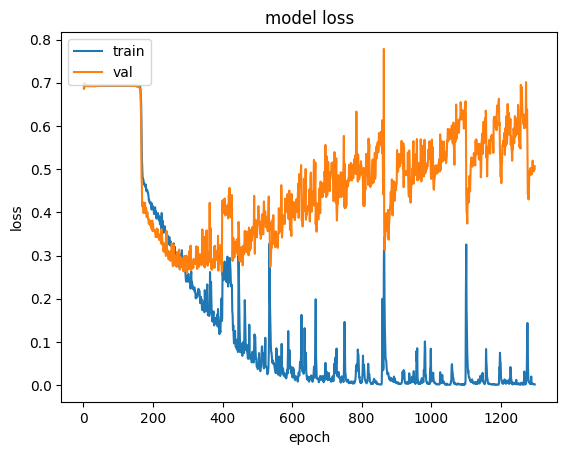

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

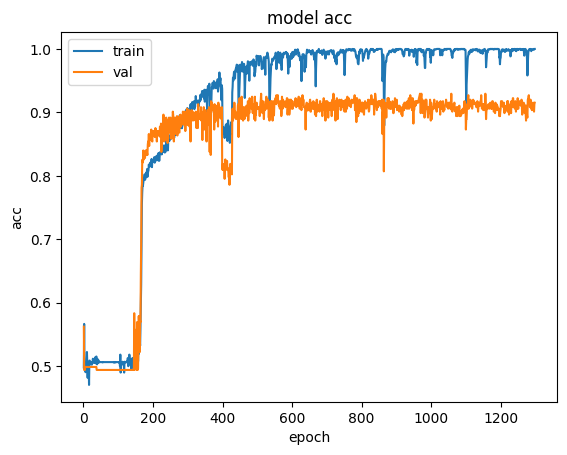

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()